In [57]:
get_processed_data_script_file=os.path.join(os.path.pardir,'src','data','get_processed_data.py')

In [90]:
%%writefile $get_processed_data_script_file
import numpy as np
import pandas as pd
import os

def read_data():
    raw_data_path = os.path.join(os.path.pardir,'data','raw')
    train_file_path = os.path.join(raw_data_path, 'train.csv')
    test_file_path = os.path.join(raw_data_path, 'test.csv')
    train_df = pd.read_csv(train_file_path, index_col='PassengerId')
    test_df = pd.read_csv(test_file_path, index_col='PassengerId')
    test_df['Survived'] = -888
    df = pd.concat((train_df, test_df), axis=0,sort=False)
    return df



def process_data(df):
    return (df
         .assign(Title = lambda x: x.Name.map(get_title))
         .pipe(fill_missing_values)
         .assign(Fare_Bin = lambda x: pd.qcut(x.Fare, 4, labels=['very_low','low','high','very_high']))
         .assign(AgeState = lambda x : np.where(x.Age >= 18, 'Adult','Child'))
         .assign(FamilySize = lambda x : x.Parch + x.SibSp + 1)
         .assign(IsMother = lambda x : np.where(((x.Sex == 'female') & (x.Parch > 0) & (x.Age > 18) & (x.Title != 'Miss')), 1, 0))
         .assign(Cabin = lambda x: np.where(x.Cabin == 'T', np.nan, x.Cabin)) 
         .assign(Deck = lambda x : x.Cabin.map(get_deck))
         .assign(IsMale = lambda x : np.where(x.Sex == 'male', 1,0))
         .pipe(pd.get_dummies, columns=['Deck', 'Pclass','Title', 'Fare_Bin', 'Embarked','AgeState'])
         .drop(['Cabin','Name','Ticket','Parch','SibSp','Sex'], axis=1)
         .pipe(reorder_columns)
         )

def get_title(name):
    title_group = {'mr' : 'Mr', 
               'mrs' : 'Mrs', 
               'miss' : 'Miss', 
               'master' : 'Master',
               'don' : 'Sir',
               'rev' : 'Sir',
               'dr' : 'Officer',
               'mme' : 'Mrs',
               'ms' : 'Mrs',
               'major' : 'Officer',
               'lady' : 'Lady',
               'sir' : 'Sir',
               'mlle' : 'Miss',
               'col' : 'Officer',
               'capt' : 'Officer',
               'the countess' : 'Lady',
               'jonkheer' : 'Sir',
               'dona' : 'Lady'
                 }
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title_group[title]

def get_deck(cabin):
    return np.where(pd.notnull(cabin),str(cabin)[0].upper(),'Z')

def fill_missing_values(df):
    df.Embarked.fillna('C', inplace=True)
    median_fare = df[(df.Pclass == 3) & (df.Embarked == 'S')]['Fare'].median()
    df.Fare.fillna(median_fare, inplace=True)
    title_age_median = df.groupby('Title').Age.transform('median')
    df.Age.fillna(title_age_median , inplace=True)
    return df

def reorder_columns(df):
    columns = [column for column in df.columns if column != 'Survived']
    columns = ['Survived'] + columns
    df = df[columns]
    return df 

    
def write_data(df):
    processed_data_path = os.path.join(os.path.pardir,'data','processed')
    write_train_path = os.path.join(processed_data_path, "train.csv")
    write_test_path = os.path.join(processed_data_path, "test.csv")
    df[df.Survived != -888].to_csv(write_train_path) 
    columns = [column for column in df.columns if column != 'Survived']
    df[df.Survived == -888][columns].to_csv(write_test_path) 

if __name__ == '__main__':
    df = read_data()
    df = process_data(df)
    write_data(df)

Overwriting ..\src\data\get_processed_data.py


In [91]:
!python $get_processed_data_script_file

In [104]:
raw_data_path = os.path.join(os.path.pardir,'data','raw')
train_file_path = os.path.join(raw_data_path, 'train.csv')
test_file_path = os.path.join(raw_data_path, 'test.csv')
train_df = pd.read_csv(train_file_path, index_col='PassengerId')
test_df = pd.read_csv(test_file_path, index_col='PassengerId')
df = pd.concat((train_df, test_df), axis=0,sort=False)


In [105]:
import matplotlib.pyplot as plt
%matplotlib inline

ValueError: max must be larger than min in range parameter.

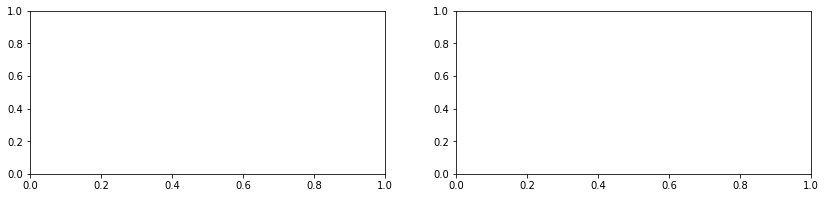

In [106]:
# Add subplots
f , (ax1, ax2) = plt.subplots(1, 2 , figsize=(14,3))

ax1.hist(df.Fare, bins=20, color='c')
ax1.set_title('Histogram : Fare')
ax1.set_xlabel('Bins')
ax1.set_ylabel('Counts')

ax2.hist(df.Age, bins=20, color='tomato')
ax2.set_title('Histogram : Age')
ax2.set_xlabel('Bins')
ax2.set_ylabel('Counts')

plt.show()

In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
Survived    418 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 39.2+ KB


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [4]:
df.Name

NameError: name 'df' is not defined

In [145]:
print('Mean Fare : {0}'.format(df.Fare.mean()))
print('Median fare: {0}'.format(df.Fare.median()))
print('Max Fare: {0}'.format(df.Fare.max()))
print('Min Fare: {0}'.format(df.Fare.min()))
print('Range Fare: {0}'.format(df.Fare.max() - df.Fare.min()))
print('25 Percentile: {0}'.format(df.Fare.quantile(.25)))
print('50 Percentile: {0}'.format(df.Fare.quantile(.50)))
print('75 Percentile: {0}'.format(df.Fare.quantile(.75)))
print('Variance: {0}'.format(df.Fare.var()))
print('Standard Deviation: {0}'.format(df.Fare.std()))

Mean Fare : 33.2954792813456
Median fare: 14.4542
Max Fare: 512.3292
Min Fare: 0.0
Range Fare: 512.3292
25 Percentile: 7.8958
50 Percentile: 14.4542
75 Percentile: 31.275
Variance: 2678.959737892894
Standard Deviation: 51.75866823917414


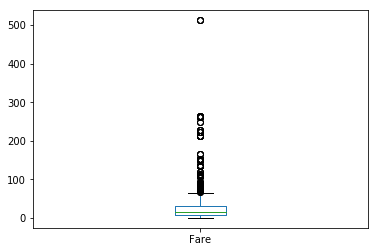

In [148]:
%matplotlib inline
df.Fare.plot(kind='box')

In [150]:
df.describe(include='all')

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
count,1046.000000,295,1307,1308.000000,1309,1309.000000,1309.000000,1309,1309.000000,891.000000,1309
unique,NaN,186,3,NaN,1307,NaN,NaN,2,NaN,NaN,929
top,NaN,C23 C25 C27,S,NaN,"Kelly, Mr. James",NaN,NaN,male,NaN,NaN,CA. 2343
freq,NaN,6,914,NaN,2,NaN,NaN,843,NaN,NaN,11
mean,29.881138,NaN,NaN,33.295479,NaN,0.385027,2.294882,NaN,0.498854,0.383838,NaN
std,14.413493,NaN,NaN,51.758668,NaN,0.865560,0.837836,NaN,1.041658,0.486592,NaN
min,0.170000,NaN,NaN,0.000000,NaN,0.000000,1.000000,NaN,0.000000,0.000000,NaN
25%,21.000000,NaN,NaN,7.895800,NaN,0.000000,2.000000,NaN,0.000000,0.000000,NaN
50%,28.000000,NaN,NaN,14.454200,NaN,0.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,39.000000,NaN,NaN,31.275000,NaN,0.000000,3.000000,NaN,1.000000,1.000000,NaN


In [151]:
df.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [152]:
df.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

In [156]:
df.Sex.value_counts(normalize=True)


male      0.644003
female    0.355997
Name: Sex, dtype: float64

In [155]:
df.Pclass.value_counts(normalize=True)


3    0.541635
1    0.246753
2    0.211612
Name: Pclass, dtype: float64

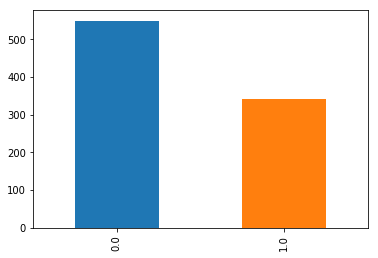

In [158]:
df[df.Survived!=-888].Survived.value_counts().plot(kind='bar')


In [134]:
df.describe()

,Age,Fare,Parch,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


In [135]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    891 non-null float64
Ticket      1309 non-null object
dtypes: float64(3), int64(3), object(5)
memory usage: 162.7+ KB


In [137]:
df.describe()

,Age,Fare,Parch,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


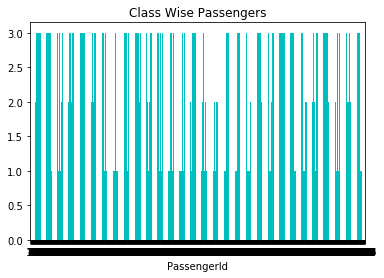

In [15]:
df.Pclass.plot(kind='bar',rot=0,title='Class Wise Passengers',color='c');

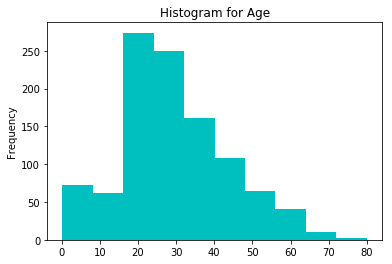

In [14]:
df.Age.plot(kind='hist',title='Histogram for Age',color='c')

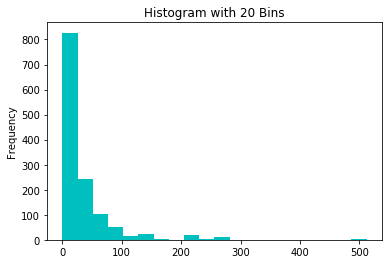

In [23]:
df.Fare.plot(kind='hist',title='Histogram with 20 Bins',color='c',bins=20);

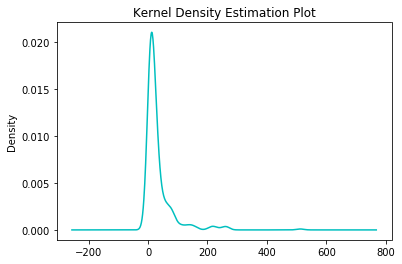

In [24]:
df.Fare.plot(kind='kde',title='Kernel Density Estimation Plot',color='c');

In [27]:
print('Skewness for Age: {0:.2f}'.format(df.Age.skew()))
print('Skewness for Fare: {0:.2f}'.format(df.Fare.skew()))

Skewness for Age: 0.41
Skewness for Fare: 4.37


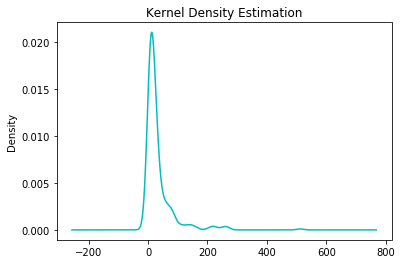

In [34]:
df.Fare.plot(kind='kde',title='Kernel Density Estimation',color='c');

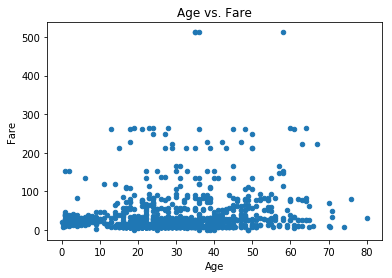

In [35]:
df.plot.scatter(x='Age',y='Fare',title='Age vs. Fare');

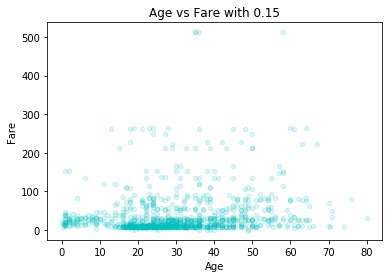

In [39]:
df.plot.scatter(x='Age',y='Fare',color='c',title='Age vs Fare with 0.15',alpha=0.15);

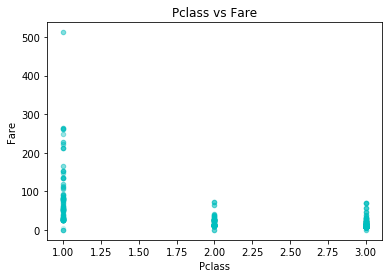

In [43]:
df.plot.scatter(x='Pclass',y='Fare',title='Pclass vs Fare',color='c',alpha=0.15);

In [44]:
df.groupby(['Pclass']).Fare.median()

Pclass
1    60.0000
2    15.0458
3     8.0500
Name: Fare, dtype: float64

In [45]:
df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

In [46]:
df.groupby(['Pclass'])['Fare','Age'].median()

,Fare,Age
Pclass,,
1,60.0000,39.0
2,15.0458,29.0
3,8.0500,24.0


In [47]:
df.groupby(['Pclass']).agg({'Age':'mean','Fare':'median'})

,Age,Fare
Pclass,,
1,39.159930,60.0000
2,29.506705,15.0458
3,24.816367,8.0500


In [54]:
aggregations={
    'Fare':{
        'Mean Fare':'mean',
        'Median Fare':'median',
        'Max Fare': max,
        'Min Fare': np.min
    },
    'Age':{
        'Mean Age':'mean',
        'Median Age':'median',
        'Max Age':max,
        'Min Age':lambda x: max(x)-min(x)
    }
}

In [55]:
df.groupby(['Pclass']).agg(aggregations)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:4658: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


Fare                                       Age             \
        Mean Fare Median Fare  Max Fare Min Fare   Mean Age Median Age   
Pclass                                                                   
1       87.508992     60.0000  512.3292      0.0  39.159930       39.0   
2       21.179196     15.0458   73.5000      0.0  29.506705       29.0   
3       13.302889      8.0500   69.5500      0.0  24.816367       24.0   

                        
       Max Age Min Age  
Pclass                  
1         80.0   79.08  
2         70.0   69.33  
3         74.0   73.83

In [56]:
pd.crosstab(df.Age,df.Fare)

Fare,0.0,3.1708,4.0125,5.0,6.2375,6.4375,6.45,6.4958,6.75,6.95,...,153.4625,164.8667,211.3375,211.5,221.7792,227.525,247.5208,262.375,263.0,512.3292
Age,,,,,,,,,,,,,,,,,,,,,
0.17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.33,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.67,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.75,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.83,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.92,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
pd.crosstab(df.Sex,df.Age)

Age,0.17,0.33,0.42,0.67,0.75,0.83,0.92,1.0,2.0,3.0,...,64.0,65.0,66.0,67.0,70.0,70.5,71.0,74.0,76.0,80.0
Sex,,,,,,,,,,,,,,,,,,,,,
female,1,0,0,0,2,0,1,5,7,3,...,2,0,0,0,0,0,0,0,1,0
male,0,1,1,1,1,3,1,5,5,4,...,3,3,1,1,2,1,2,1,0,1


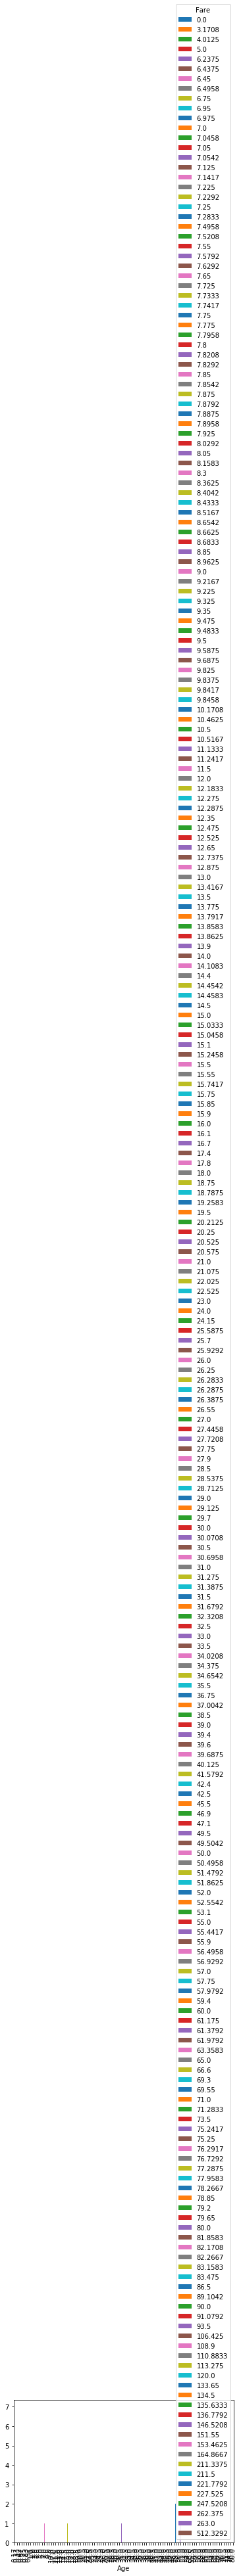

In [58]:
pd.crosstab(df.Age,df.Fare).plot(kind='bar');

In [59]:
df.groupby(['Sex','Pclass']).Age.mean()

Sex     Pclass
female  1         37.037594
        2         27.499223
        3         22.185329
male    1         41.029272
        2         30.815380
        3         25.962264
Name: Age, dtype: float64

In [60]:
df.groupby(['Sex','Pclass']).Age.mean().unstack()

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


In [61]:
df.pivot_table(index='Sex',columns='Pclass',values='Age',aggfunc='mean')

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    891 non-null float64
Ticket      1309 non-null object
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


In [10]:
df[df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
62,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,1,female,0,1.0,113572
830,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,female,0,1.0,113572


In [11]:
pd.crosstab(df[df.Survived!=-888].Survived,df[df.Survived!=-888].Embarked)

Embarked,C,Q,S
Survived,,,
0.0,75,47,427
1.0,93,30,217


In [12]:
#df.loc[df.Embarked.isnull(),'Embarked']='S'
#df.Embarked.fillna('S',inplace=True)

In [14]:
#being Sherlock Holmes:
df.groupby(['Pclass','Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [14]:
df.Embarked.fillna('C',inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [16]:
df[df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,


In [17]:
df[df.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1044,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,3,male,0,-888,3701


In [20]:
median_fare=df.loc[(df.Pclass==3) & (df.Embarked=='S'),'Fare' ].median()
print(median_fare)

8.05


In [21]:
df.Fare.fillna(median_fare,inplace=True)

In [24]:
df[df.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,


In [26]:
pd.options.display.max_rows=15
df[df.Age.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877
18,NaN,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,2,male,0,1,244373
20,NaN,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,3,female,0,1,2649
27,NaN,NaN,C,7.2250,"Emir, Mr. Farred Chehab",0,3,male,0,0,2631
29,NaN,NaN,Q,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,3,female,0,1,330959
30,NaN,NaN,S,7.8958,"Todoroff, Mr. Lalio",0,3,male,0,0,349216
32,NaN,B78,C,146.5208,"Spencer, Mrs. William Augustus (Marie Eugenie)",0,1,female,1,1,PC 17569
...,...,...,...,...,...,...,...,...,...,...,...
1274,NaN,NaN,S,14.5000,"Risien, Mrs. Samuel (Emma)",0,3,female,0,-888,364498


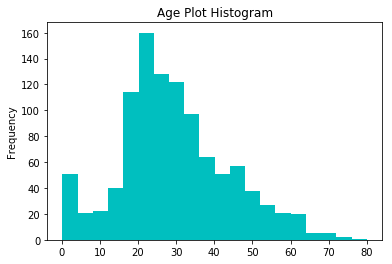

In [28]:
df.Age.plot(kind='hist',title='Age Plot Histogram',bins=20,color='c');

In [31]:
df.Age.mean()
#which is very near to 30 but values at extreme may dissapoint the result, hence Mean() cannot be used

29.881137667304014

df.groupby('Sex').Age.median()

In [32]:
df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

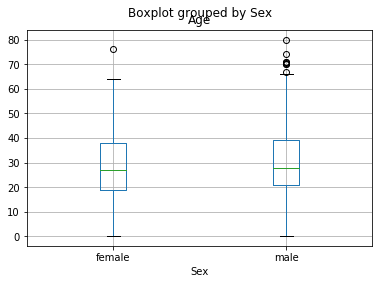

In [33]:
df[df.Age.notnull()].boxplot('Age','Sex');
#hence Gender is also not considerable

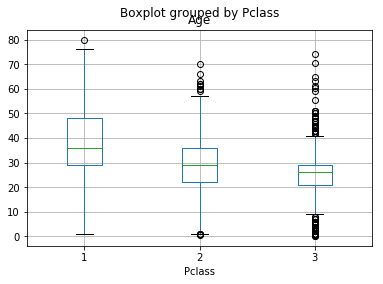

In [56]:
df[df.Age.notnull()].boxplot('Age','Pclass');
# Nope

In [35]:
df.Name

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
6                                        Moran, Mr. James
7                                 McCarthy, Mr. Timothy J
                              ...                        
1303      Minahan, Mrs. William Edward (Lillian E Thorpe)
1304                       Henriksson, Miss. Jenny Lovisa
1305                                   Spector, Mr. Woolf
1306                         Oliva y Ocana, Dona. Fermina
1307                         Saether, Mr. Simon Sivertsen
1308                                  Ware, Mr. Frederick
1309                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

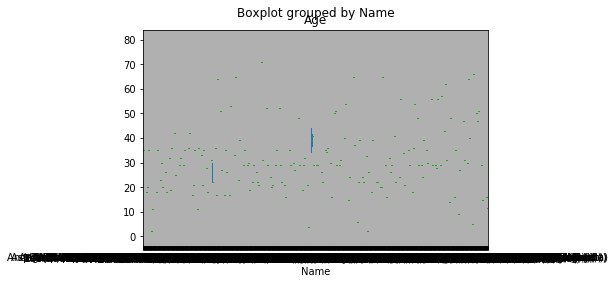

In [57]:
df[df.Age.notnull()].boxplot('Age','Name');

In [38]:
#format is Sir-name , Title
def GetTitle(name):
    first_name_with_Title = name.split(',')[1]
    title=first_name_with_Title.split('.')[0]
    title=title.strip().lower()
    return title

In [39]:
df.Name.map(lambda x: GetTitle(x))

PassengerId
1           mr
2          mrs
3         miss
4          mrs
5           mr
6           mr
7           mr
         ...  
1303       mrs
1304      miss
1305        mr
1306      dona
1307        mr
1308        mr
1309    master
Name: Name, Length: 1309, dtype: object

In [41]:
df.Name.map(lambda x: GetTitle(x)).unique()
#converted into dict

array(['mr', 'mrs', 'miss', 'master', 'don', 'rev', 'dr', 'mme', 'ms',
       'major', 'lady', 'sir', 'mlle', 'col', 'capt', 'the countess',
       'jonkheer', 'dona'], dtype=object)

In [44]:
#modify GetTitle


In [48]:
df['Title']=df.Name.map(lambda x: GetTitle(x))

In [49]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171,Mr
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599,Mrs
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282,Miss
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803,Mrs
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450,Mr


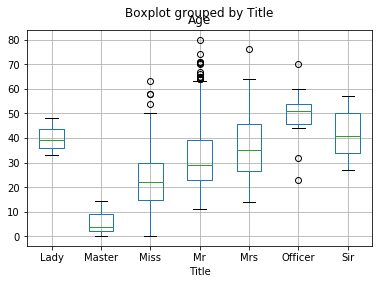

In [50]:
df[df.Age.notnull()].boxplot('Age','Title');

In [51]:
title_age_median=df.groupby('Title').Age.transform('median')

In [52]:
df.Age.fillna(title_age_median,inplace=True)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
Age         1309 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
Title       1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 132.9+ KB
